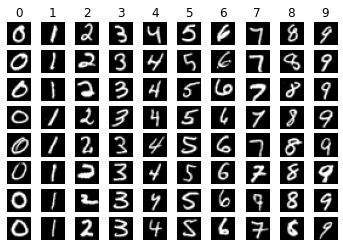

Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       0.54      0.94      0.69       164
           1       0.71      0.94      0.81       152
           2       0.83      0.50      0.62       155
           3       0.83      0.53      0.65       154
           4       0.75      0.31      0.44       143
           5       0.67      0.16      0.25       141
           6       0.81      0.85      0.83       143
           7       0.83      0.82      0.83       158
           8       0.41      0.64      0.50       132
           9       0.60      0.84      0.70       158

    accuracy                           0.66      1500
   macro avg       0.70      0.65      0.63      1500
weighted avg       0.70      0.66      0.64      1500


Confusion matrix SKLearn GNB:
[[154   0   6   0   1   1   0   0   1   1]
 [  1 143   1   0   0   1   0   1   3   2]
 [ 11   6  77  10   2   1  19   1  27   1]
 [ 32  11   5  82   0   0   2   3  12   7]
 [ 

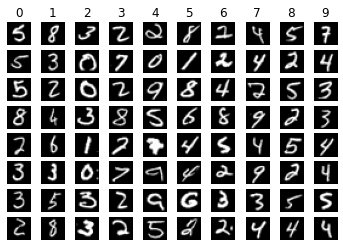

In [2]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from Handout_MNIST import MNIST
import numpy as np
from scipy.stats import norm

# load the MNIST_Light data
mnist = MNIST.MNISTData('Handout_MNIST/MNIST_Light/*/*.png')

# get_data() produces the subsets with already normalised (between 0.0 and 1.0) data
train_features, test_features, train_labels, test_labels = mnist.get_data()

# just show some of the images
mnist.visualize_random()

gnb = GaussianNB()
gnb.fit(train_features, train_labels)
y_pred = gnb.predict(test_features)

print("Classification report SKLearn GNB:\n%s\n"
  % (metrics.classification_report(test_labels, y_pred)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(test_labels, y_pred))

# show the first 8 (or less) wrongly classified images for each class
mnist.visualize_wrong_class(y_pred, 8)


In [3]:
from sklearn.datasets import load_digits

nbr_labels = 10
train_features, train_labels = load_digits(return_X_y = True)
print(train_features[20], train_labels[20])

[ 0.  0.  3. 13. 11.  7.  0.  0.  0.  0. 11. 16. 16. 16.  2.  0.  0.  4.
 16.  9.  1. 14.  2.  0.  0.  4. 16.  0.  0. 16.  2.  0.  0.  0. 16.  1.
  0. 12.  8.  0.  0.  0. 15.  9.  0. 13.  6.  0.  0.  0.  9. 14.  9. 14.
  1.  0.  0.  0.  2. 12. 13.  4.  0.  0.] 0


In [73]:
def get_count_by_label_by_pixel(nbr_labels, train_features, train_labels, threshold=10):
    #Initialize data structure containing features for all samples
    count_by_labels_by_pixel = []
    for i in range(len(train_features[0])):
        count_by_labels_by_pixel.append([])
        for j in range(nbr_labels):
            count_by_labels_by_pixel[i].append(0)


    #Populate the data structure
    for sample_index, sample_arr in enumerate(train_features):
        sample_label = train_labels[sample_index]
        
        for pixel_index, pixel in enumerate(sample_arr):
            val = 0
            if(pixel >= threshold):
                val = 1
            count_by_labels_by_pixel[pixel_index][sample_label] += val
    
    return count_by_labels_by_pixel
    ##
    ##
    ##

    # stats_by_label_by_pixel = []
    # for i in range(len(train_features[0])):
    #     stats_by_label_by_pixel.append([])
        
    # #Calculate mean and std. dev. for each pixel
    # for pixel_index, pixel_values_by_label in enumerate(count_by_labels_by_pixel):
    #     for label_index in range(len(pixel_values_by_label)):
    #         # values = values_by_labels_by_pixel[pixel_index][label_index]
    #         # mean = np.mean(values)
    #         # variance = np.var(values)
    #         # stats_by_label_by_pixel[pixel_index].append((mean, variance))

    # return stats_by_label_by_pixel

count_by_labels_by_pixel = get_count_by_label_by_pixel(10, train_features, train_labels)
# print(stats_by_label_by_pixel)

In [56]:
def get_pixel_conditional(label, pixel_index, count_by_labels_by_pixel):
    count = count_by_labels_by_pixel[pixel_index][label]
    
    # print(mean, variance)
    return (count+1) / len(train_features)


print(get_pixel_conditional(8, 52, count_by_labels_by_pixel))

0.0895937673900946


In [14]:
def get_label_probabilities(nbr_labels, train_labels):
    label_occurences = [0 for label in range(nbr_labels)]
    for label in train_labels:
        label_occurences[label] += 1
        
    label_probabilities = [ label_occurences[label] / len(train_labels) for label in range(nbr_labels)]
    return label_probabilities

In [74]:
def predict(x, threshold=10):
    values = np.zeros(nbr_labels)
    priors = get_label_probabilities(nbr_labels, train_labels)
 
    # print('random cond', get_pixel_conditional(5, 3, count_by_labels_by_pixel))
    for label in range(nbr_labels):
        prior = priors[label]
        values[label] = prior

        for pixel_index, pixel in enumerate(x):
            if(pixel >= threshold):
                p_index_is_label = get_pixel_conditional(label, pixel_index, count_by_labels_by_pixel)
                values[label] *= p_index_is_label
    
    # print(values)
    return np.argmax(values)
    

i = 25
prediction = predict(train_features[i])
print("label", train_labels[i], "prediction", prediction)

prediction = predict(train_features[13])

y_pred = []
for sample in train_features:
    y_pred.append(predict(sample))

print(metrics.confusion_matrix(train_labels, y_pred))

label 5 prediction 5
[[164   0   0   0   4   3   2   0   4   1]
 [  0 144   4   0   0   1   4   0  20   9]
 [  0  14 140   3   0   0   0   1  18   1]
 [  0   2   2 146   0   0   0   5  17  11]
 [  0  11   0   0 158   1   2   5   4   0]
 [  0   1   0   1   2 154   2   0   4  18]
 [  0   3   0   0   0   0 175   0   3   0]
 [  0   1   2   0   2   0   0 164  10   0]
 [  0  19   2   0   0   3   0   1 148   1]
 [  0   3   0   6   0   2   0   6  15 148]]
